### <div style="color:#ffffff; background-color:#666666; padding:15px; border-radius:25px; text-align:center;">Text Classification using Support Vector Machines</div>

In [81]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_corpus = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_corpus = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

print('Train size:', len(train_corpus.data))
print('Test size:', len(test_corpus.data))

Train size: 11314
Test size: 7532


In [83]:
train_corpus.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [84]:
print('Labels:', train_corpus.target_names)

print('\nLabel encoding:', train_corpus.target)

print('\nExample article:', train_corpus.data[0])

Labels: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Label encoding: [7 4 4 ... 3 1 8]

Example article: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


[]

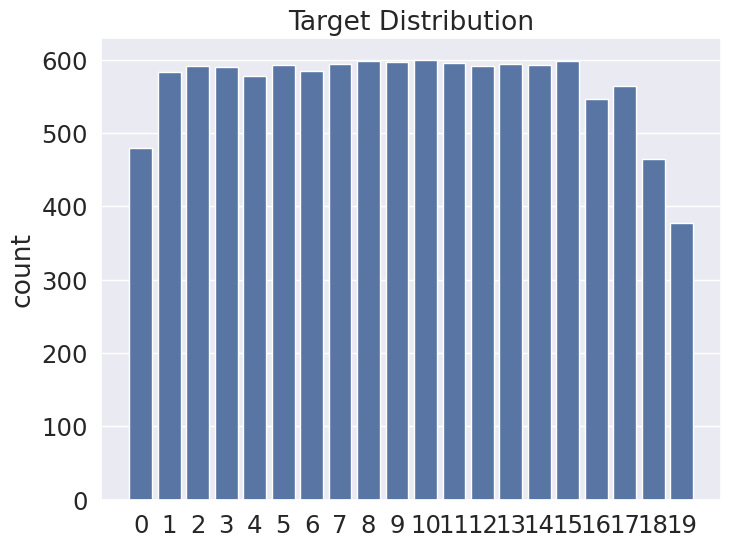

In [85]:

plt.figure(figsize=(8,6))
sns.countplot(x=train_corpus.target)
plt.title("Target Distribution")
plt.plot()

In [86]:
import spacy

In [87]:
nlp = spacy.blank('en')

In [88]:
def tokenizer(doc):
  return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and t.is_alpha]


In [89]:
vectorizer = CountVectorizer(tokenizer = tokenizer)

In [90]:
x = vectorizer.fit_transform(train_corpus.data)
y = train_corpus.target


x_test = vectorizer.transform(test_corpus.data)
y_test = test_corpus.target

In [91]:
classifier = MultinomialNB()
classifier.fit(x, y)

MultinomialNB()

In [92]:
y_pred = classifier.predict(x_test)

In [93]:
cm = confusion_matrix(y_test, y_pred)

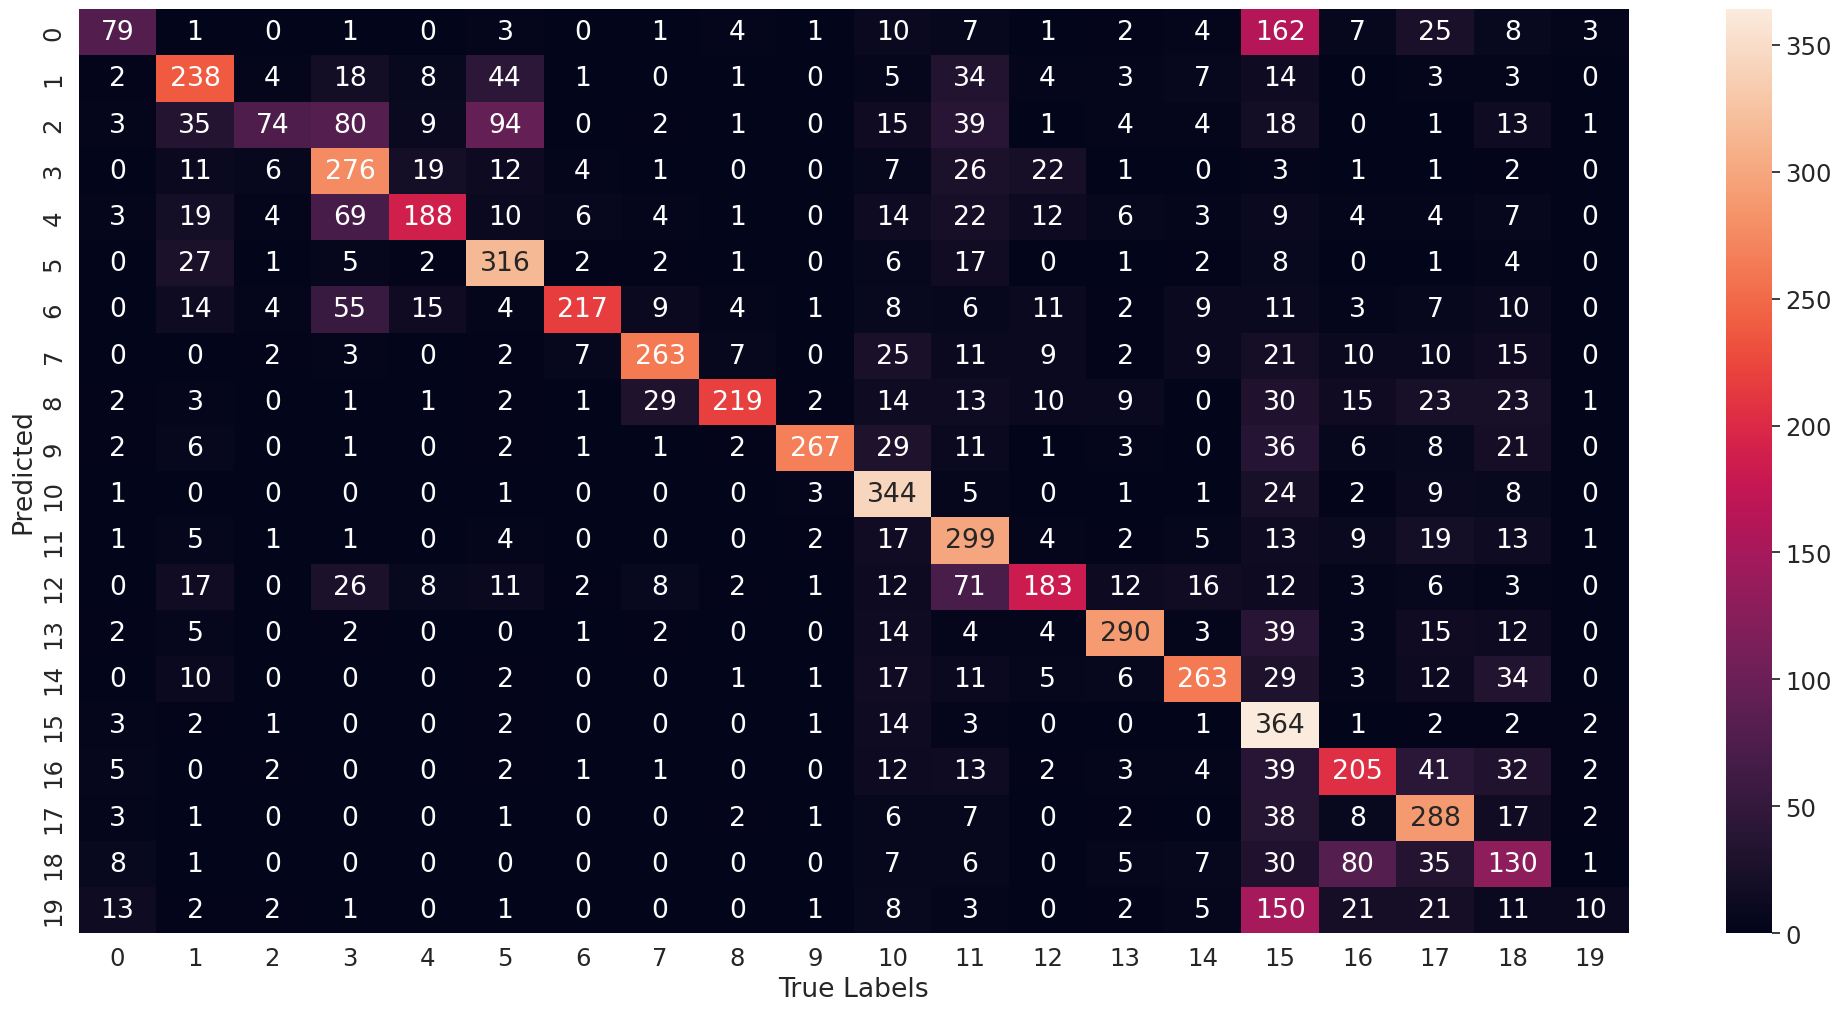

In [94]:
plt.figure(figsize=(25,12))
sns.heatmap(cm,annot=True,fmt =".0f")
plt.xlabel("True Labels")
plt.ylabel("Predicted")
plt.show()

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.25      0.35       319
           1       0.60      0.61      0.61       389
           2       0.73      0.19      0.30       394
           3       0.51      0.70      0.59       392
           4       0.75      0.49      0.59       385
           5       0.62      0.80      0.70       395
           6       0.89      0.56      0.69       390
           7       0.81      0.66      0.73       396
           8       0.89      0.55      0.68       398
           9       0.95      0.67      0.79       397
          10       0.59      0.86      0.70       399
          11       0.49      0.76      0.60       396
          12       0.68      0.47      0.55       393
          13       0.81      0.73      0.77       396
          14       0.77      0.67      0.71       394
          15       0.35      0.91      0.50       398
          16       0.54      0.56      0.55       364
          17       0.54    